In [2]:
import pandas as pd
import polars as pl
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
WS = pd.read_excel("./Dados_C100_patricio.xlsx")
df_c100 = pl.DataFrame(WS)


In [4]:
from scipy import integrate


In [5]:
df_c100.drop("Unnamed: 0")
df_100 = df_c100.select(
    [
        pl.col("Corrente [A]").alias("I"),
        pl.col("Tempo [s]").alias("t"),
        pl.col("Tensão [V]").alias("V"),
    ]
)
int_cumulative = integrate.cumulative_trapezoid(df_100["I"], x=df_100["t"])
integral = integrate.trapz(df_100["I"], x=df_100["t"])


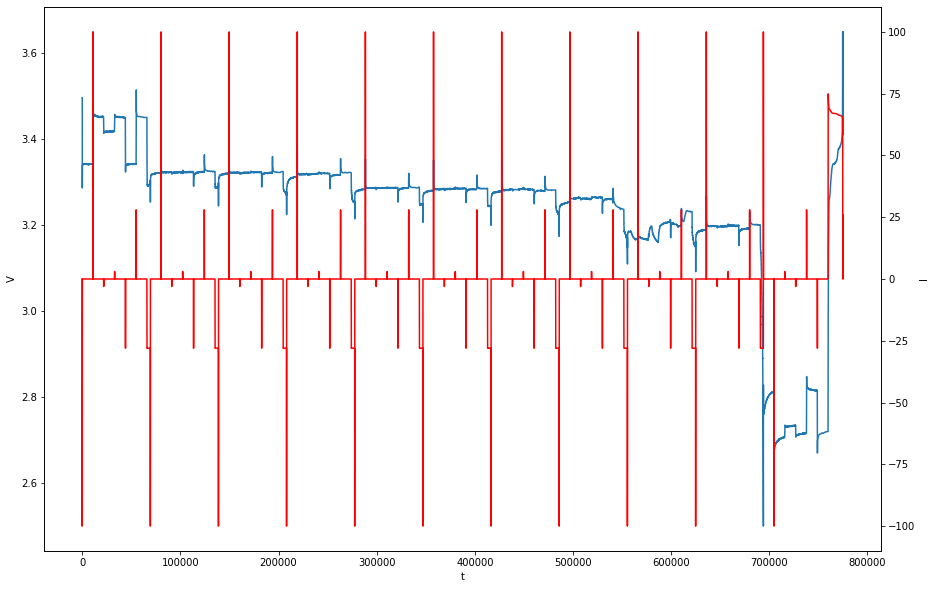

In [6]:
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=df_100.to_pandas(), x="t", y="V")
ax2 = ax.twinx()
sns.lineplot(data=df_100.to_pandas(), x="t", y="I", ax=ax2, color="red")
plt.show()
plt.close()


In [7]:
df_c100["Tensão [V]"].min()


2.5

In [8]:
int_cumulative.min() / 60 / 60


-271.5832398893718

In [96]:
df_tmp = df_100.filter((pl.col("I").shift(2) == 0) & (pl.col("I") < -99))["t"]


In [98]:
ts = []
n_ant = 0
for i, n in enumerate(df_100["t"]):
    if n == n_ant:
        continue
    if n in (df_tmp):
        ts.append(i)
    n_ant = n


In [76]:
z = 1 - int_cumulative / int_cumulative.min()


In [101]:
z[ts]


array([0.99992121, 0.89972373, 0.80011121, 0.70018156, 0.59969705,
       0.49886181, 0.39787608, 0.29648346, 0.19333107, 0.08972434,
       0.0069716 , 0.00694092])

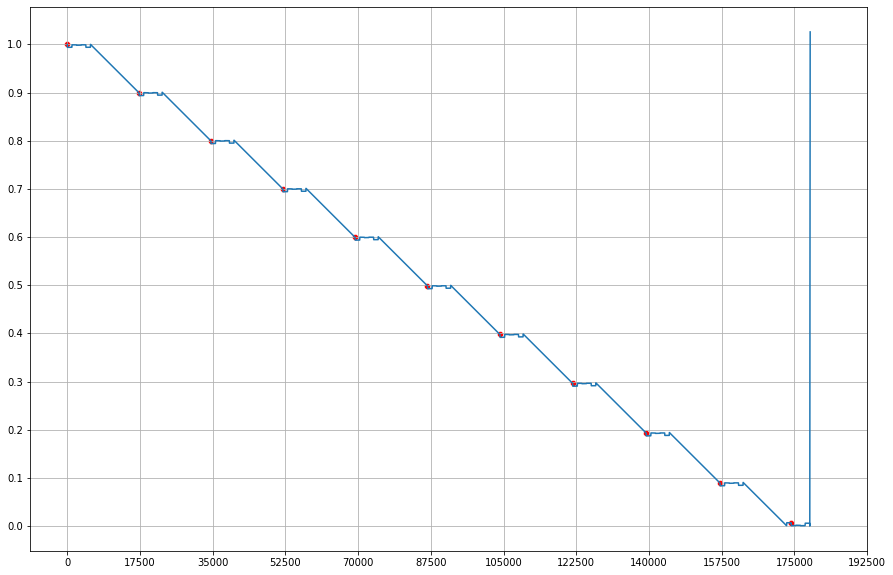

In [100]:
plt.figure(figsize=(30, 20))
plt.plot(z)
sns.scatterplot(y=z[ts], x=ts, color="red")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 200000, 17500))
plt.grid()
plt.show()
plt.close()
